# Przetwarzanie sygnałów i obrazów: Sprawozdanie 004


### Temat: Analiza widmowa sygnałów.
### Imię i nazwisko studenta: Paweł Niewiarowski, Szymon Łupiński
### Data realizacji ćwiczenia: 16.11.2022

In [1]:
import numpy as np
import wave
import librosa

from matplotlib import pyplot
from scipy import signal
from scipy.io import wavfile
from librosa import display

In [2]:
class Plot:
    def __init__(self, x_values, y_values, title,
                 x_label, y_label, ax, y_lim=None, x_lim=None, label=None):
        self.x_values = x_values
        self.y_values = y_values
        self.title = title
        self.x_label = x_label
        self.y_label = y_label
        self.ax = ax
        self.y_lim = y_lim
        self.x_lim = x_lim
        self.label = label

    def draw(self):
        if self.label:
            self.ax.plot(self.x_values, self.y_values, label=self.label)
        else:
            self.ax.plot(self.x_values, self.y_values)
        self.ax.set_title(self.title)
        self.ax.set_xlabel(self.x_label)
        self.ax.set_ylabel(self.y_label)
        self.ax.grid()
        if self.y_lim:
            self.ax.set_ylim(self.y_lim[0], self.y_lim[1])
        if self.x_lim:
            self.ax.set_xlim(self.x_lim[0], self.x_lim[1])
        if self.label:
            self.ax.legend()

## Zadanie 4.1
Wygenerować/nagrać następujące sygnały (dł. 3s każdy, tempo próbkowania fs = 8kHz):
- szum gaussowski
- sygnał sinusoidalny o stałej częstotliwości 1kHz
- sygnał o zmiennej częstotliwości w zakresie od 0Hz (0s) do 1kHz (5s) (patrz funkcja chirp)
- sygnał mowy

Następnie, dla każdego z sygnałów wykreślić obwiednię mocy w czasie (dla uzyskania lepszej przejrzystości zamiast funkcji stem można użyć funkcji plot).
W celu oszacowania mocy sygnału w czasie Px[n] zastosować uśrednianie wykładnicze/rekursywne, zgodnie ze wzorem: Px[n] = αPx[n-1] + (1-α)x[n]^2,
gdzie x[n] - n-ta próbka sygnału oraz 0<α<1 parametr uśredniający.

Sprawdzić, jaki wpływ na obwiednię mocy ma dobór parametru alfa?

    Odpowiedź: Wraz z wzrostem alfa, amplituda zmiejsza się.

Co możesz powiedzieć o stacjonarności sygnałów na podstawie kształtu obwiedni?

    Odpowiedź: Sygnał jest bardziej stacjonarny gdy jego obwiednia jest bardziej regularna.

In [3]:
def envelope(x_values, alpha):
    size = len(x_values)
    pxs = np.empty(size)
    pxs[0] = (1 - alpha) * x_values[0] ** 2
    n = 1

    while n <= size - 1:
        pxs[n] = alpha * pxs[n - 1] + (1 - alpha) * x_values[n] ** 2
        n += 1

    return pxs

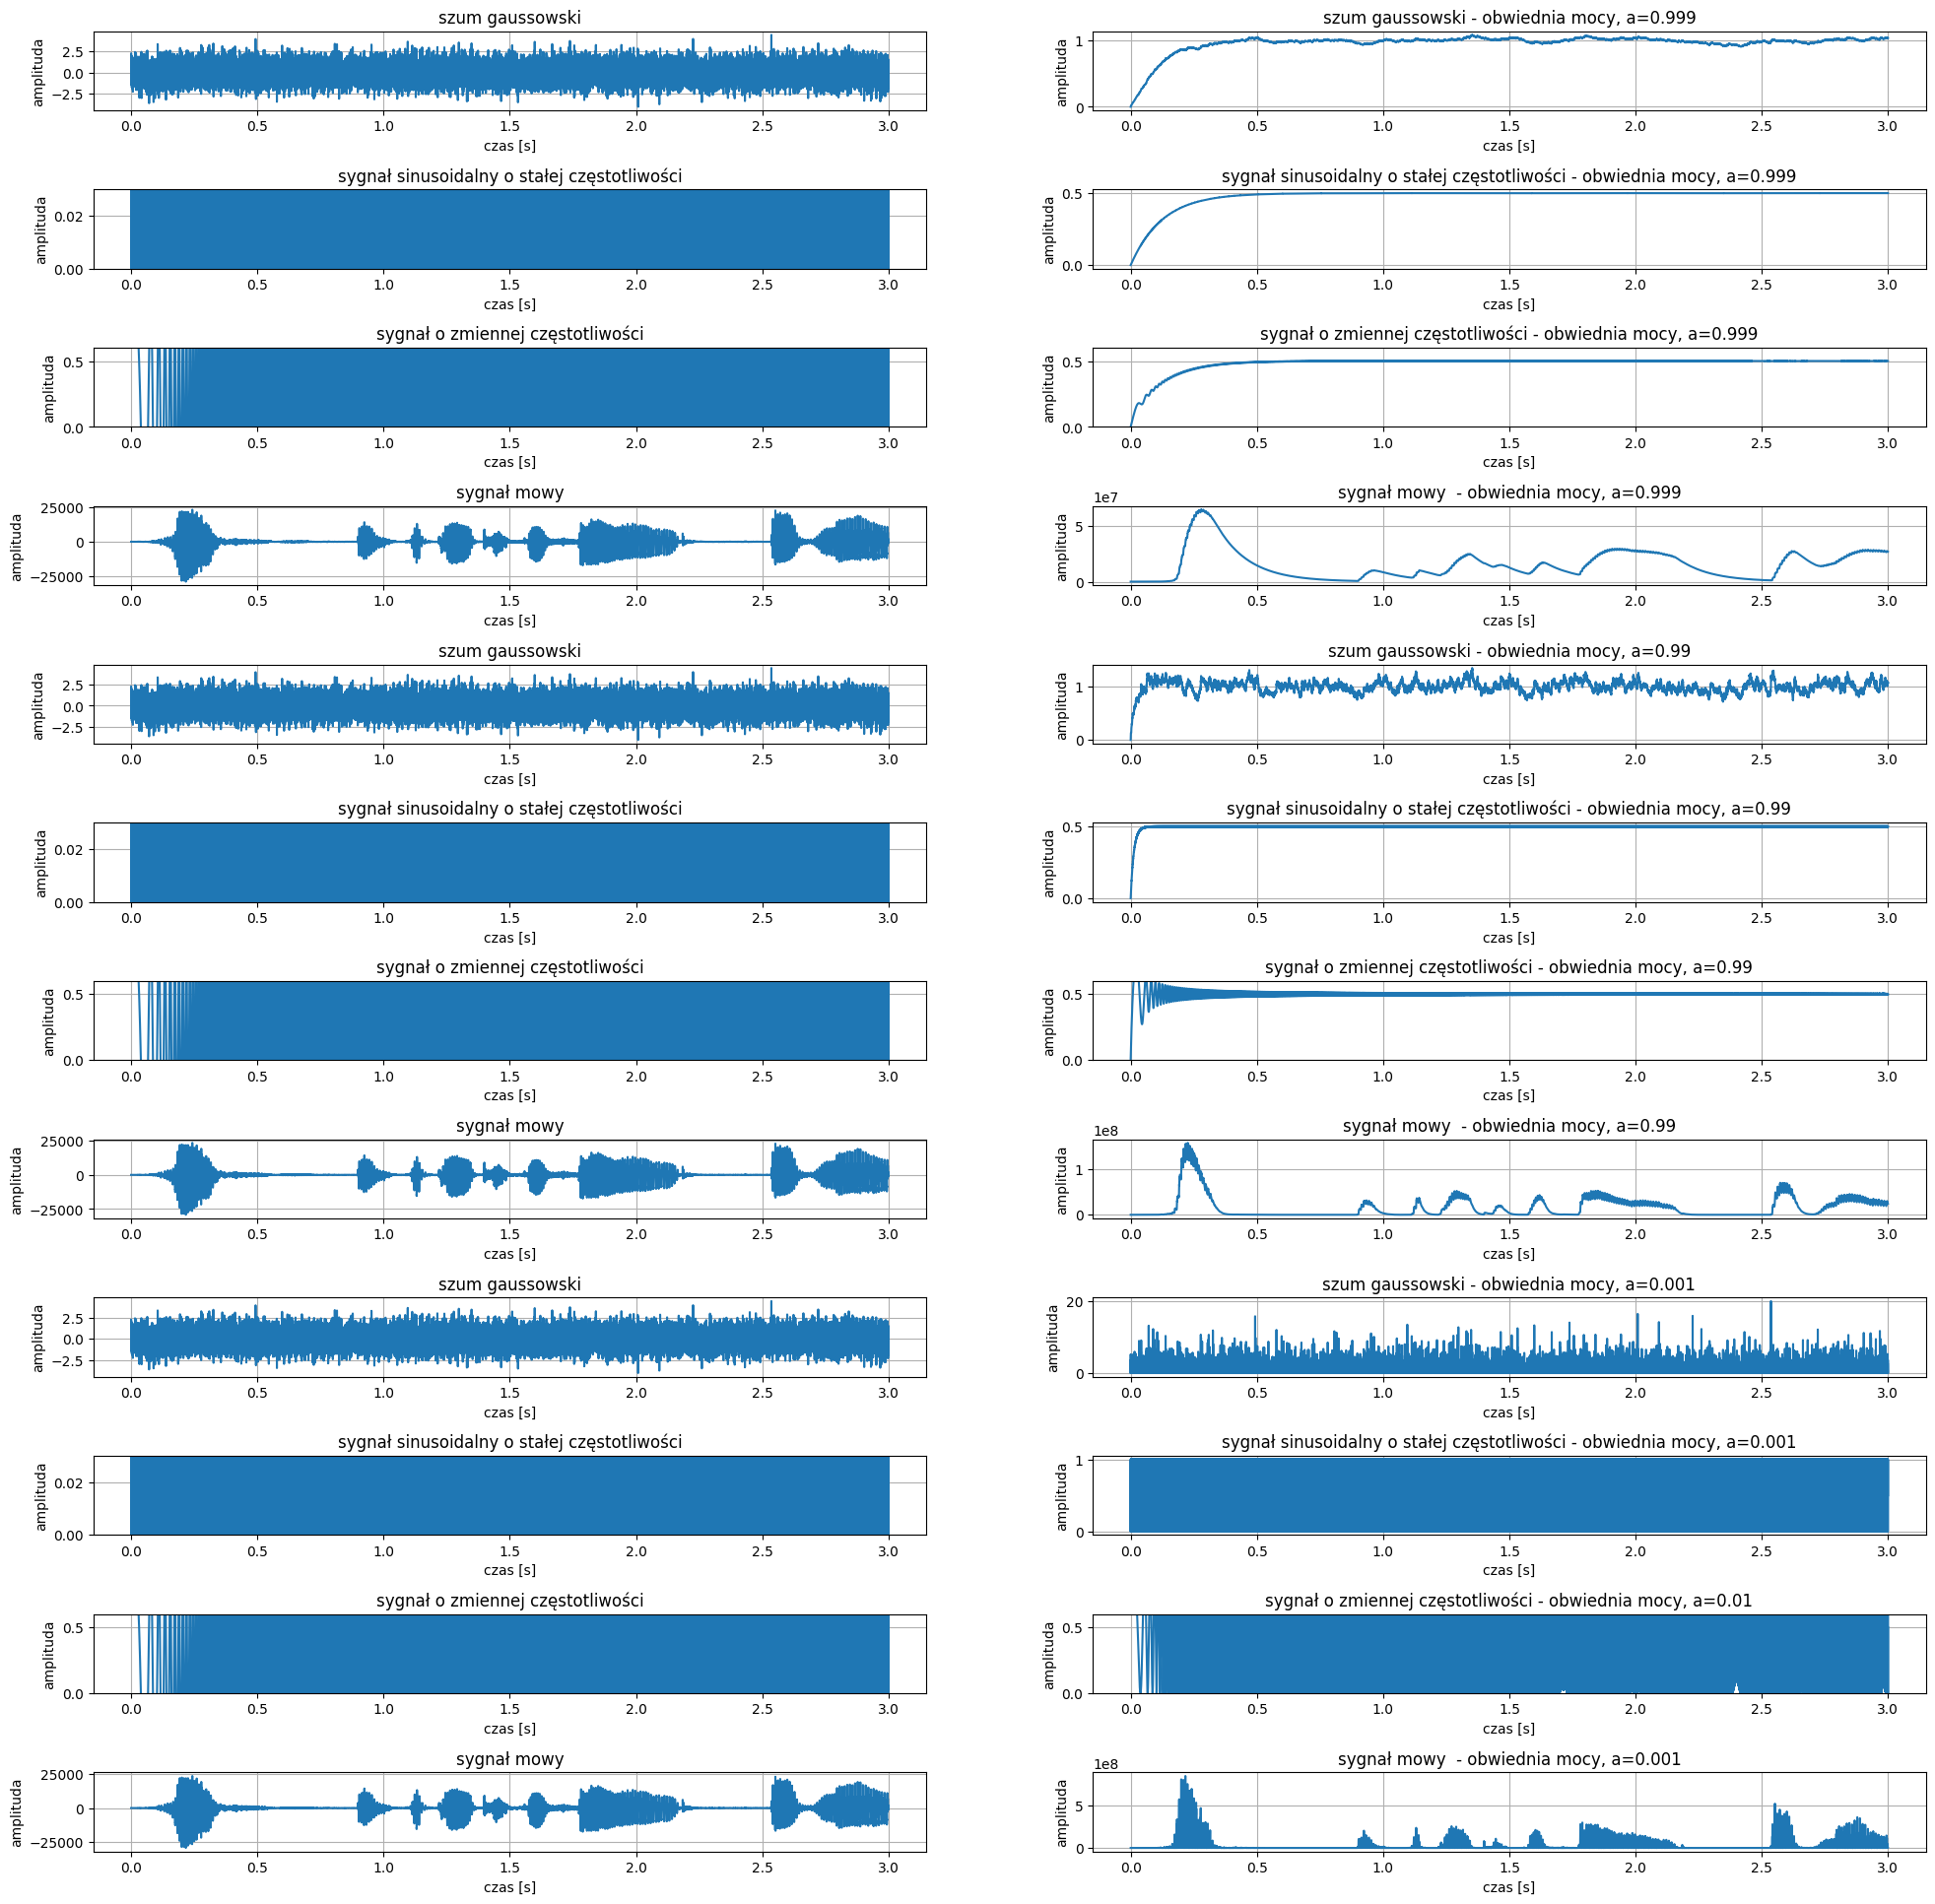

In [4]:
T = 3
FS = 8000
TS = 1 / FS
N = 3 * FS
alphas = [
    0.999,
    0.99,
    0.001,
]

fig, axs = pyplot.subplots(12, 2)
fig.set_size_inches(24, 24)

x_values: np.ndarray = np.arange(0, T, TS)

gauss_values: np.ndarray = np.random.normal(0, 1, N)
sin_values: np.ndarray = np.sin(2 * np.pi * 1000 * x_values)
chirp_values: np.ndarray = signal.chirp(x_values, 0, T, 1000)
speak_values: np.ndarray = wavfile.read('../audio/voice.wav')[1]

for plot in [
    Plot(x_values, gauss_values, 'szum gaussowski', 'czas [s]', 'amplituda', axs[0][0]),
    Plot(x_values, envelope(gauss_values, alphas[0]), 'szum gaussowski - obwiednia mocy, a=0.999', 'czas [s]',
         'amplituda', axs[0][1]),

    Plot(x_values, sin_values, 'sygnał sinusoidalny o stałej częstotliwości', 'czas [s]', 'amplituda', axs[1][0],
         (0, T * 0.01)),
    Plot(x_values, envelope(sin_values, alphas[0]),
         'sygnał sinusoidalny o stałej częstotliwości - obwiednia mocy, a=0.999', 'czas [s]', 'amplituda', axs[1][1]),

    Plot(x_values, chirp_values, 'sygnał o zmiennej częstotliwości', 'czas [s]', 'amplituda', axs[2][0], (0, T * 0.2)),
    Plot(x_values, envelope(chirp_values, alphas[0]), 'sygnał o zmiennej częstotliwości - obwiednia mocy, a=0.999',
         'czas [s]', 'amplituda', axs[2][1], (0, T * 0.2)),

    Plot(x_values, speak_values[:24000], 'sygnał mowy', 'czas [s]', 'amplituda', axs[3][0]),
    Plot(x_values, envelope(speak_values[:24000], alphas[0]), 'sygnał mowy  - obwiednia mocy, a=0.999', 'czas [s]',
         'amplituda', axs[3][1]),

    Plot(x_values, gauss_values, 'szum gaussowski', 'czas [s]', 'amplituda', axs[4][0]),
    Plot(x_values, envelope(gauss_values, alphas[1]), 'szum gaussowski - obwiednia mocy, a=0.99', 'czas [s]',
         'amplituda', axs[4][1]),

    Plot(x_values, sin_values, 'sygnał sinusoidalny o stałej częstotliwości', 'czas [s]', 'amplituda', axs[5][0],
         (0, T * 0.01)),
    Plot(x_values, envelope(sin_values, alphas[1]),
         'sygnał sinusoidalny o stałej częstotliwości - obwiednia mocy, a=0.99', 'czas [s]', 'amplituda', axs[5][1]),

    Plot(x_values, chirp_values, 'sygnał o zmiennej częstotliwości', 'czas [s]', 'amplituda', axs[6][0], (0, T * 0.2)),
    Plot(x_values, envelope(chirp_values, alphas[1]), 'sygnał o zmiennej częstotliwości - obwiednia mocy, a=0.99',
         'czas [s]', 'amplituda', axs[6][1], (0, T * 0.2)),

    Plot(x_values, speak_values[:24000], 'sygnał mowy', 'czas [s]', 'amplituda', axs[7][0]),
    Plot(x_values, envelope(speak_values[:24000], alphas[1]), 'sygnał mowy  - obwiednia mocy, a=0.99', 'czas [s]',
         'amplituda', axs[7][1]),

    Plot(x_values, gauss_values, 'szum gaussowski', 'czas [s]', 'amplituda', axs[8][0]),
    Plot(x_values, envelope(gauss_values, alphas[2]), 'szum gaussowski - obwiednia mocy, a=0.001', 'czas [s]',
         'amplituda', axs[8][1]),

    Plot(x_values, sin_values, 'sygnał sinusoidalny o stałej częstotliwości', 'czas [s]', 'amplituda', axs[9][0],
         (0, T * 0.01)),
    Plot(x_values, envelope(sin_values, alphas[2]),
         'sygnał sinusoidalny o stałej częstotliwości - obwiednia mocy, a=0.001', 'czas [s]', 'amplituda', axs[9][1]),

    Plot(x_values, chirp_values, 'sygnał o zmiennej częstotliwości', 'czas [s]', 'amplituda', axs[10][0], (0, T * 0.2)),
    Plot(x_values, envelope(chirp_values, alphas[2]), 'sygnał o zmiennej częstotliwości - obwiednia mocy, a=0.01',
         'czas [s]', 'amplituda', axs[10][1], (0, T * 0.2)),

    Plot(x_values, speak_values[:24000], 'sygnał mowy', 'czas [s]', 'amplituda', axs[11][0]),
    Plot(x_values, envelope(speak_values[:24000], alphas[2]), 'sygnał mowy  - obwiednia mocy, a=0.001', 'czas [s]',
         'amplituda', axs[11][1]),
]:
    plot.draw()

pyplot.subplots_adjust(hspace=1)
pyplot.show()

## Zadanie 4.2
Wygenerować następujące sygnały z amplitudą jednostkową i częstotliwością 1 kHz oraz czasie trwania 2 sekund:
- sygnał sinusoidalny
- sygnał prostokątny
- sygnał trójkątny
- sygnał piłokształtny
- szum gaussowski
- sygnał sinusoidalny o przestrajanej częstotliwości od 1 kHz do 2 kHz

Dodatkowo wczytać sygnał mowy oraz sygnał muzyki. Rekomendowana częstotliwość próbkowania to 16 kHz dla sygnałów syntetycznych, 8 kHz dla sygnału mowy, 44.1 lub 48 kHz dla sygnału muzyki.

- a) wykreślić wygenerowane sygnały w dziedzinie czasu (skalę czasu na wykresach
dobrać tak, aby zmaksymalizować ich czytelność),

- b) wykonać analizę widmową sygnałów korzystając używając periodogramów.
Sporządzić wykresy w skali decybelowej. Oś pozioma powinna reprezentować
częstotliwość w Hz.


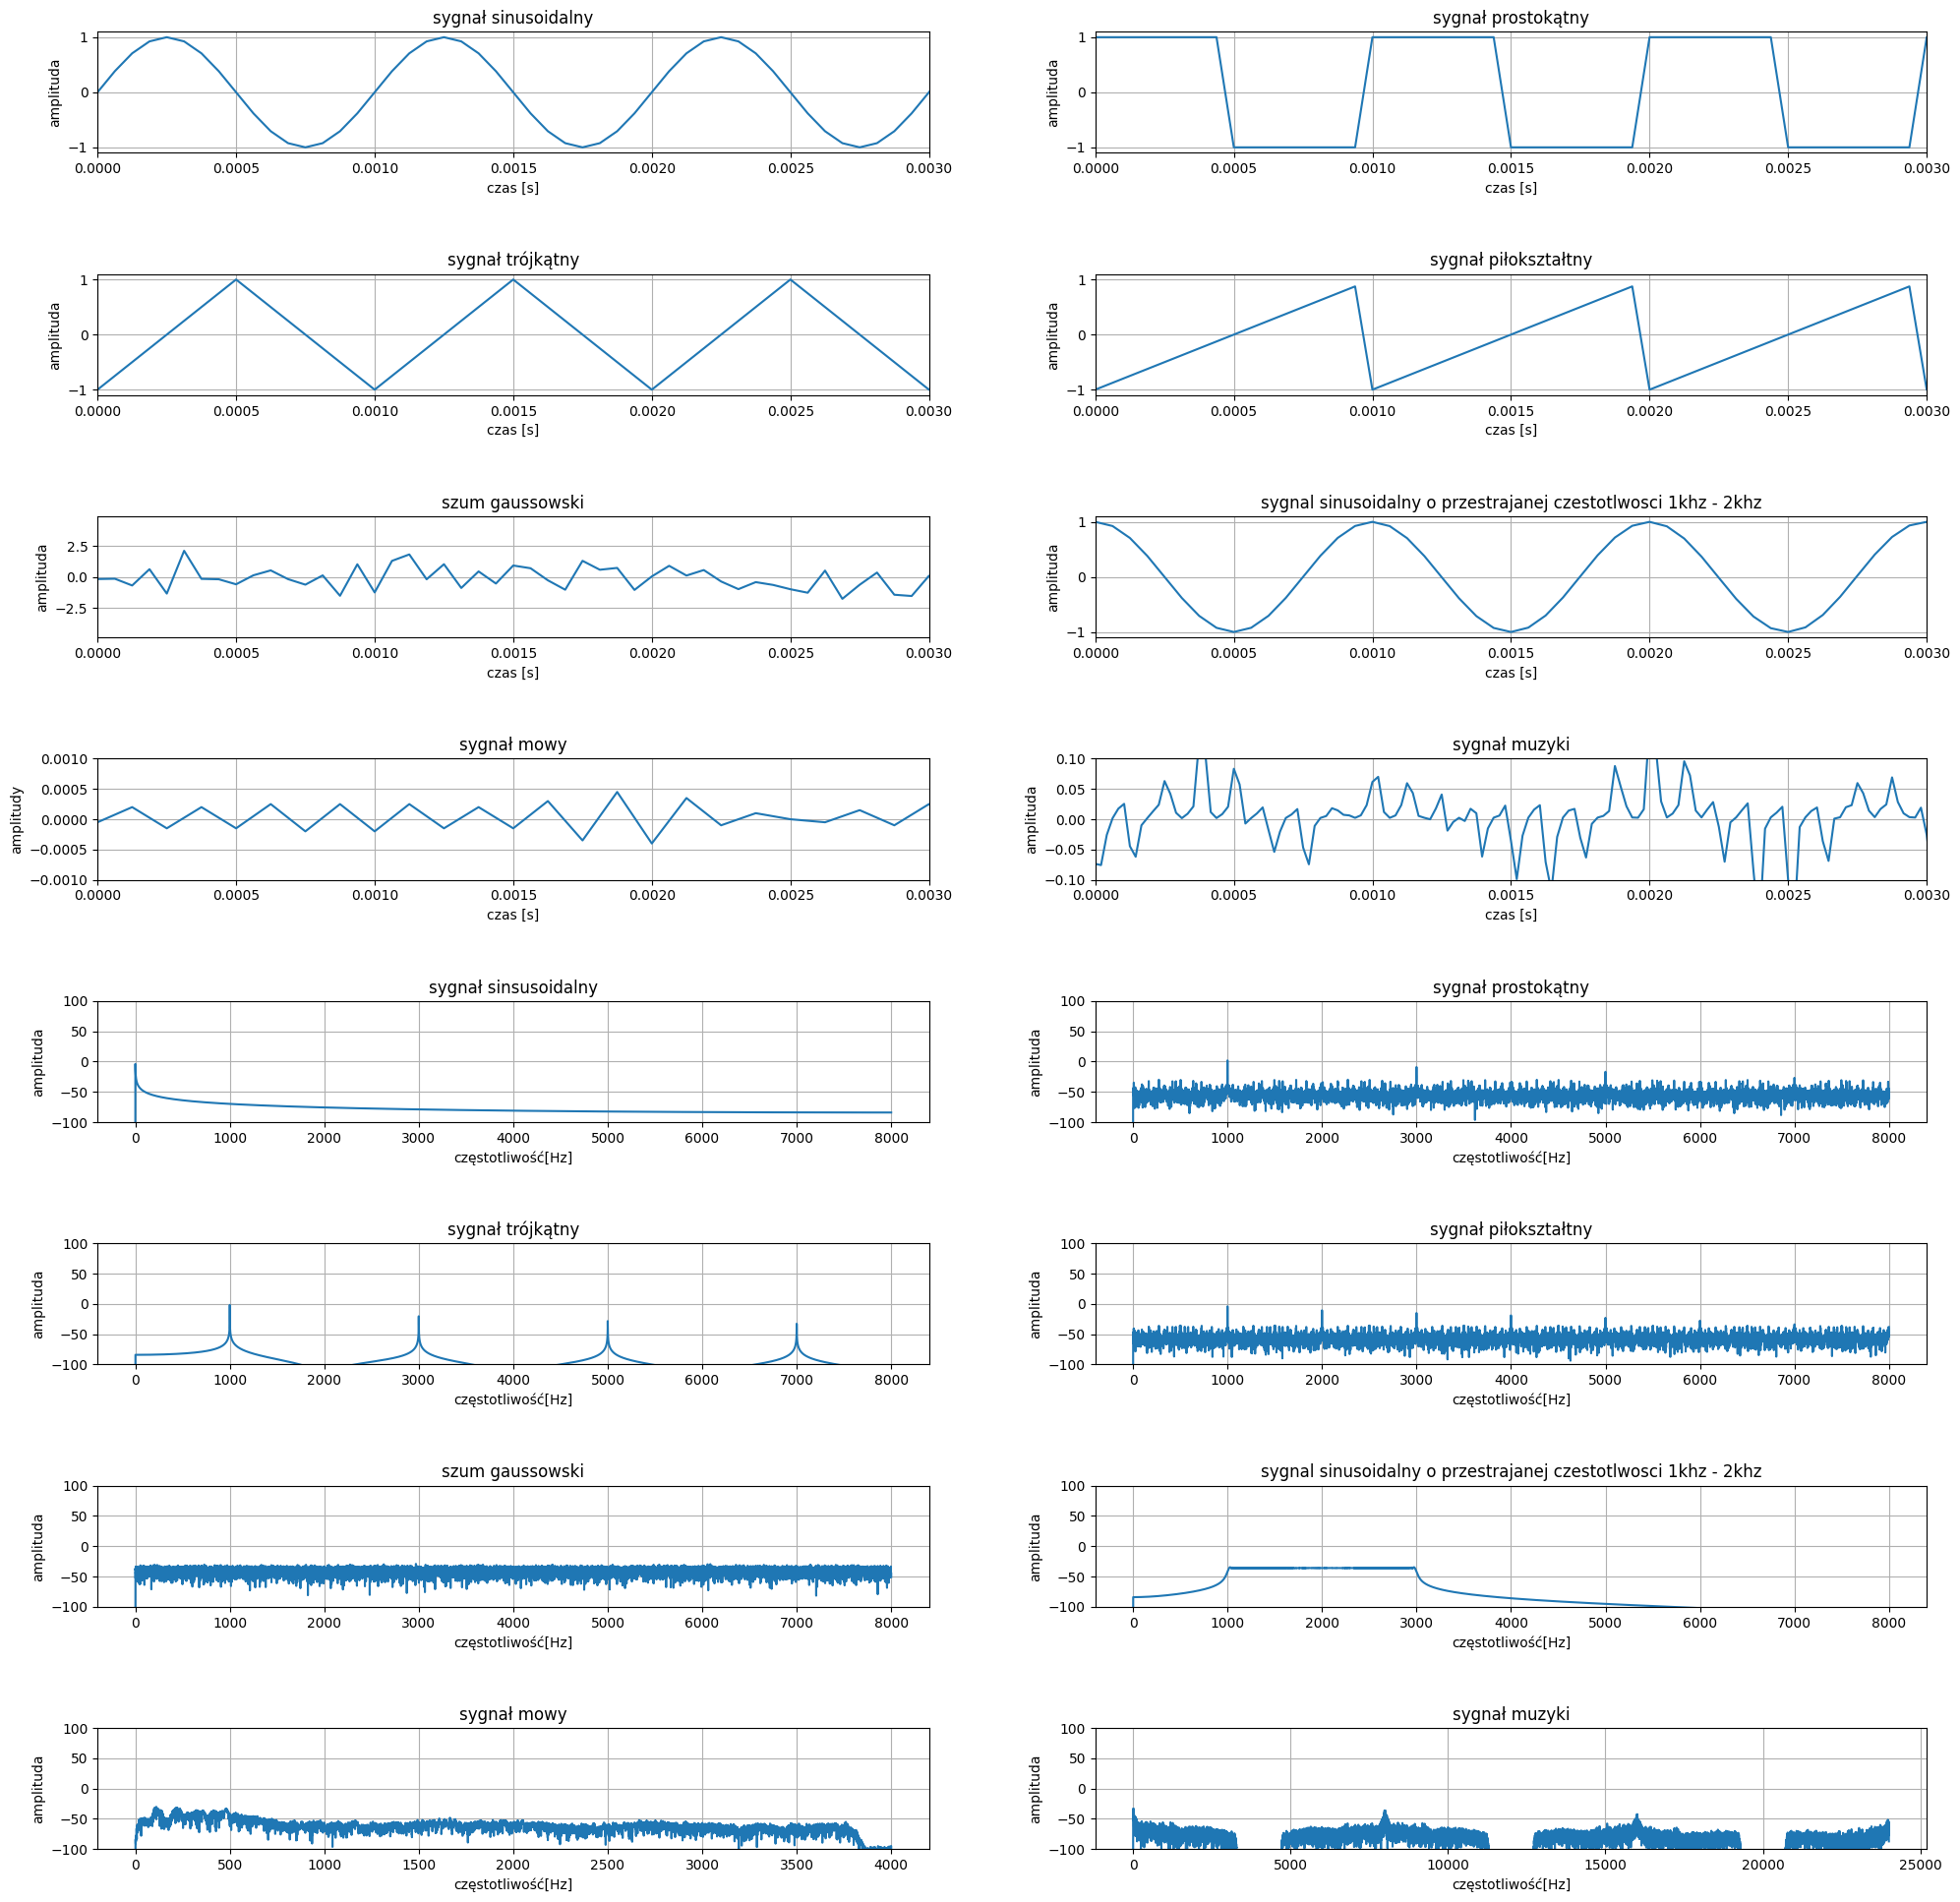

In [5]:
FS = 16000
TS = 1 / FS

FS_VOICE = 8000
TS_VOICE = 1 / FS_VOICE

FS_MUSIC = 48000
TS_MUSIC = 1 / FS_MUSIC

F = 1000

voice = wave.open('../audio/my_voice.wav')
music = wave.open('../audio/music.wav')

x_values = np.arange(0, 2 + TS, TS)

sin_values = np.sin(2 * np.pi * x_values * F)
square_values = signal.square(2 * np.pi * x_values * F)
triangle_values = signal.sawtooth(2 * np.pi * x_values * F, 0.5)
sawtooth_values = signal.sawtooth(2 * np.pi * x_values * F)
gauss_values = np.random.normal(0, 1, len(x_values))
chirp_values = signal.chirp(x_values, 1000, 1, 2000)

voice_x_values = np.arange(0, 2, TS_VOICE)
voice_y_values = np.resize(np.frombuffer(voice.readframes(-1), dtype='int16'), 16000) / 20000

music_x_values = np.arange(0, 2, TS_MUSIC)
music_y_values = np.resize(np.frombuffer(music.readframes(-1), dtype='int16'), 96000) / 10000

f_sin, pxx_sin = signal.periodogram(x_values, FS)
f_square, pxx_square = signal.periodogram(square_values, FS)
f_triangle, pxx_triangle = signal.periodogram(triangle_values, FS)
f_sawtooth, pxx_sawtooth = signal.periodogram(sawtooth_values, FS)
f_gauss, pxx_gauss = signal.periodogram(gauss_values, FS)
f_chirp, pxx_chirp = signal.periodogram(chirp_values, FS)
f_voice, pxx_voice = signal.periodogram(voice_y_values, FS_VOICE)
f_music, pxx_music = signal.periodogram(music_y_values, FS_MUSIC)

_, axs = pyplot.subplots(8, 2, figsize=(24, 24))

for plot in [
    Plot(x_values, sin_values, 'sygnał sinusoidalny', 'czas [s]', 'amplituda', axs[0][0], x_lim=(0, 0.003)),
    Plot(x_values, square_values, 'sygnał prostokątny', 'czas [s]', 'amplituda', axs[0][1], x_lim=(0, 0.003)),
    Plot(x_values, triangle_values, 'sygnał trójkątny', 'czas [s]', 'amplituda', axs[1][0], x_lim=(0, 0.003)),
    Plot(x_values, sawtooth_values, 'sygnał piłokształtny', 'czas [s]', 'amplituda', axs[1][1], x_lim=(0, 0.003)),
    Plot(x_values, gauss_values, 'szum gaussowski', 'czas [s]', 'amplituda', axs[2][0], x_lim=(0, 0.003)),
    Plot(x_values, chirp_values, 'sygnal sinusoidalny o przestrajanej czestotlwosci 1khz - 2khz', 'czas [s]',
         'amplituda', axs[2][1], x_lim=(0, 0.003)),
    Plot(voice_x_values, voice_y_values, 'sygnał mowy', 'czas [s]', 'amplitudy', axs[3][0], x_lim=(0, 0.003),
         y_lim=(-0.001, 0.001)),
    Plot(music_x_values, music_y_values, 'sygnał muzyki', 'czas [s]', 'amplituda', axs[3][1], x_lim=(0, 0.003),
         y_lim=(-0.1, 0.1)),

    Plot(f_sin, 10 * np.log10(pxx_sin), 'sygnał sinsusoidalny', 'częstotliwość[Hz]', 'amplituda', axs[4][0],
         y_lim=(-100, 100)),
    Plot(f_square, 10 * np.log10(pxx_square), 'sygnał prostokątny', 'częstotliwość[Hz]', 'amplituda', axs[4][1],
         y_lim=(-100, 100)),
    Plot(f_triangle, 10 * np.log10(pxx_triangle), 'sygnał trójkątny', 'częstotliwość[Hz]', 'amplituda', axs[5][0],
         y_lim=(-100, 100)),
    Plot(f_sawtooth, 10 * np.log10(pxx_sawtooth), 'sygnał piłokształtny', 'częstotliwość[Hz]', 'amplituda', axs[5][1],
         y_lim=(-100, 100)),
    Plot(f_gauss, 10 * np.log10(pxx_gauss), 'szum gaussowski', 'częstotliwość[Hz]', 'amplituda', axs[6][0],
         y_lim=(-100, 100)),
    Plot(f_chirp, 10 * np.log10(pxx_chirp), 'sygnal sinusoidalny o przestrajanej czestotlwosci 1khz - 2khz',
         'częstotliwość[Hz]', 'amplituda', axs[6][1], y_lim=(-100, 100)),
    Plot(f_voice, 10 * np.log10(pxx_voice), 'sygnał mowy', 'częstotliwość[Hz]', 'amplituda', axs[7][0],
         y_lim=(-100, 100)),
    Plot(f_music, 10 * np.log10(pxx_music), 'sygnał muzyki', 'częstotliwość[Hz]', 'amplituda', axs[7][1],
         y_lim=(-100, 100))
]:
    plot.draw()

pyplot.subplots_adjust(hspace=1)


## Zadanie 4.3
Dokonać ponownej analizy sygnałów z zadania poprzednieo w dziedzinie częstotliwości przy użyciu spektrogramów. Użyć funkcji spectrogram lub analogicznej ( okno Hamminga o długości 1024 próbek). Zwróć uwagę no to, by osie wykresu były opisane przy użyciu jednostek fizycznych ( a nie znormalizowanych ).

Co możesz powiedzieć o rozkładzie energii w czasie i częstotliwości?

    Odpowiedź:
        Sygnał sinusoidalny posiada największą energię skupioną na częstotliwości 1000Hz w całym okresie.
        Sygnał prostokątny posiada największą energię skupioną na częstotliwościach 1000Hz, 3000Hz, 5000Hz, 7000Hz jednocześnie w całym okresie.
        Sygnał trójkątny posia największą energię na 1000, 3000, 5000, 7000 Hz jednocześnie na całym okresie.



In [6]:
class Mesh:
    def __init__(self, fig, ax, x_values, y_values, z_values, title):
        self.fig = fig
        self.ax = ax
        self.x_values = x_values
        self.y_values = y_values
        self.z_values = z_values
        self.title = title

    def draw(self):
        ax = self.ax.pcolormesh(self.x_values, self.y_values, self.z_values, cmap='rainbow')

        self.ax.set_ylabel('czestotliwosc [Hz]')
        self.ax.set_xlabel('czas [s]')
        self.ax.set_title(self.title)

        legend = fig.colorbar(ax, ax=self.ax)
        legend.set_label('moc/częstotliwość [dB/Hz]')


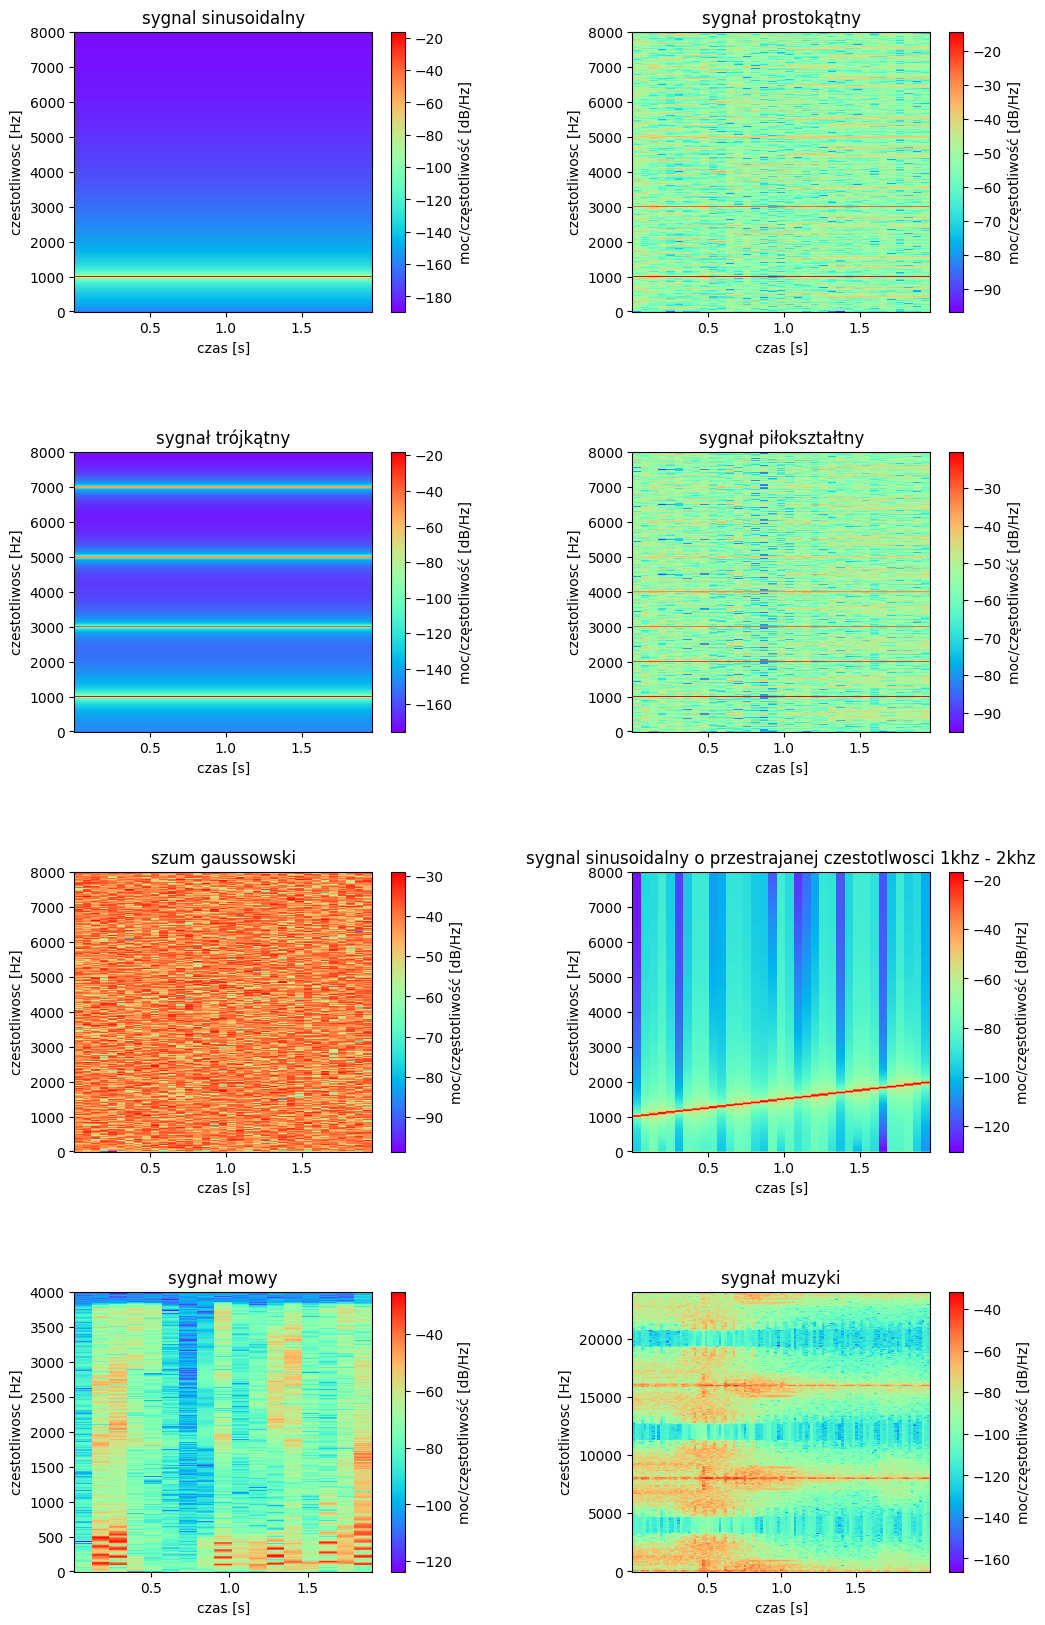

In [7]:
FS = 16000
TS = 1 / FS

FS_VOICE = 8000
TS_VOICE = 1 / FS_VOICE

FS_MUSIC = 48000
TS_MUSIC = 1 / FS_MUSIC

F = 1000

voice = wave.open('../audio/my_voice.wav')
music = wave.open('../audio/music.wav')

x_values = np.arange(0, 2, TS)
sin_values = np.sin(2 * np.pi * x_values * F)
square_values = signal.square(2 * np.pi * x_values * F)
triangle_values = signal.sawtooth(2 * np.pi * x_values * F, 0.5)
sawtooth_values = signal.sawtooth(2 * np.pi * x_values * F)
gauss_values = np.random.normal(0, 1, len(x_values))
chirp_values = signal.chirp(x_values, 1000, 2, 2000)

voice_x_values = np.arange(0, 2, TS_VOICE)
voice_y_values = np.resize(np.frombuffer(voice.readframes(-1), dtype='int16'), 16000) / 20000

music_x_values = np.arange(0, 2, TS_MUSIC)
music_y_values = np.resize(np.frombuffer(music.readframes(-1), dtype='int16'), 96000) / 10000

f_sin, t_sin, sxx_sin = signal.spectrogram(sin_values, fs=FS, window=np.hamming(1024), nperseg=1024)
f_square, t_square, sxx_square = signal.spectrogram(square_values, fs=FS, window=np.hamming(1024), nperseg=1024)
f_triangle, t_triangle, sxx_triangle = signal.spectrogram(triangle_values, fs=FS, window=np.hamming(1024), nperseg=1024)
f_sawtooth, t_sawtooth, sxx_sawtooth = signal.spectrogram(sawtooth_values, fs=FS, window=np.hamming(1024), nperseg=1024)
f_gauss, t_gauss, sxx_gauss = signal.spectrogram(gauss_values, fs=FS, window=np.hamming(1024), nperseg=1024)
f_chirp, t_chirp, sxx_chirp = signal.spectrogram(chirp_values, fs=FS, window=np.hamming(1024), nperseg=1024)
f_voice, t_voice, sxx_voice = signal.spectrogram(voice_y_values, fs=FS_VOICE, window=np.hamming(1024), nperseg=1024)
f_music, t_music, sxx_music = signal.spectrogram(music_y_values, fs=FS_MUSIC, window=np.hamming(1024), nperseg=1024)

fig, axs = pyplot.subplots(4, 2, figsize=(12, 20))

for mesh in [
    Mesh(fig, axs[0][0], t_sin, f_sin, 10 * np.log10(sxx_sin), 'sygnal sinusoidalny'),
    Mesh(fig, axs[0][1], t_square, f_square, 10 * np.log10(sxx_square), 'sygnał prostokątny'),
    Mesh(fig, axs[1][0], t_triangle, f_triangle, 10 * np.log10(sxx_triangle), 'sygnał trójkątny'),
    Mesh(fig, axs[1][1], t_sawtooth, f_sawtooth, 10 * np.log10(sxx_sawtooth), 'sygnał piłokształtny'),
    Mesh(fig, axs[2][0], t_gauss, f_gauss, 10 * np.log10(sxx_gauss), 'szum gaussowski'),
    Mesh(fig, axs[2][1], t_chirp, f_chirp, 10 * np.log10(sxx_chirp),
         'sygnal sinusoidalny o przestrajanej czestotlwosci 1khz - 2khz'),
    Mesh(fig, axs[3][0], t_voice, f_voice, 10 * np.log10(sxx_voice), 'sygnał mowy'),
    Mesh(fig, axs[3][1], t_music, f_music, 10 * np.log10(sxx_music), 'sygnał muzyki'),
]:
    mesh.draw()

pyplot.subplots_adjust(hspace=0.5, wspace=0.5)


## Zadanie 4.4
Ponownie wygenerować spektrogramy dla sygnałów z zadania 4.2 z użyciem melowej skali częstotliwości (tzw. Mel-spektrogramy). Porównać wyniki ze spekrogramami z zadania poprzedniego.

Co możesz powiedzieć o rozdzielczości spektrogramów dla małych częstotliwości?

    Odpowiedź: Są one bardziej dokładne z uwagi na ich większą rozdzielczość.


In [8]:
class Mel:
    def __init__(self, y_values, title):
        self.y_values = y_values
        self.title = title

    def draw(self):
        pyplot.figure(figsize=(10, 8))

        mel = librosa.feature.melspectrogram(y=self.y_values, sr=FS, n_fft=1024)
        mel_abs = np.abs(mel)
        mel_abs_power = librosa.power_to_db(mel_abs)

        librosa.display.specshow(mel_abs_power, sr=FS, x_axis='time', y_axis="mel", cmap="rainbow")

        pyplot.colorbar(label="dB")
        pyplot.title("Sygnał sinusoidalny")
        pyplot.xlabel("Czas [s]")
        pyplot.ylabel("Częstotliwość [Hz]")

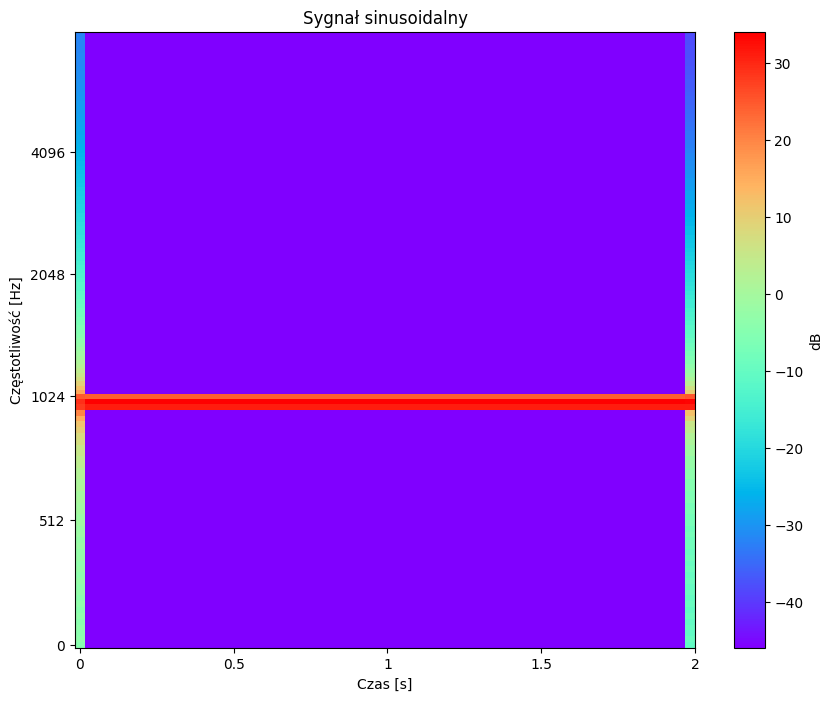

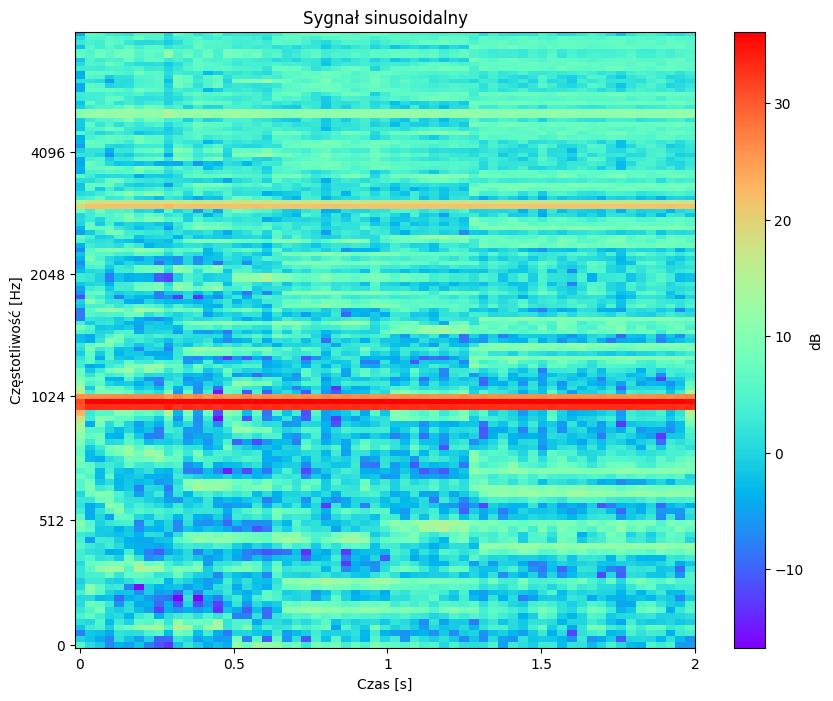

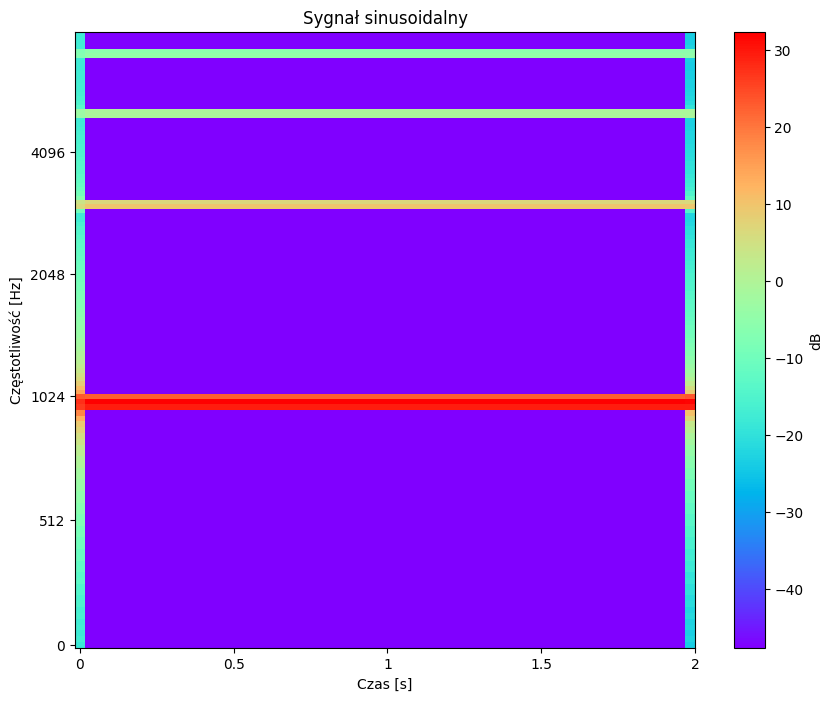

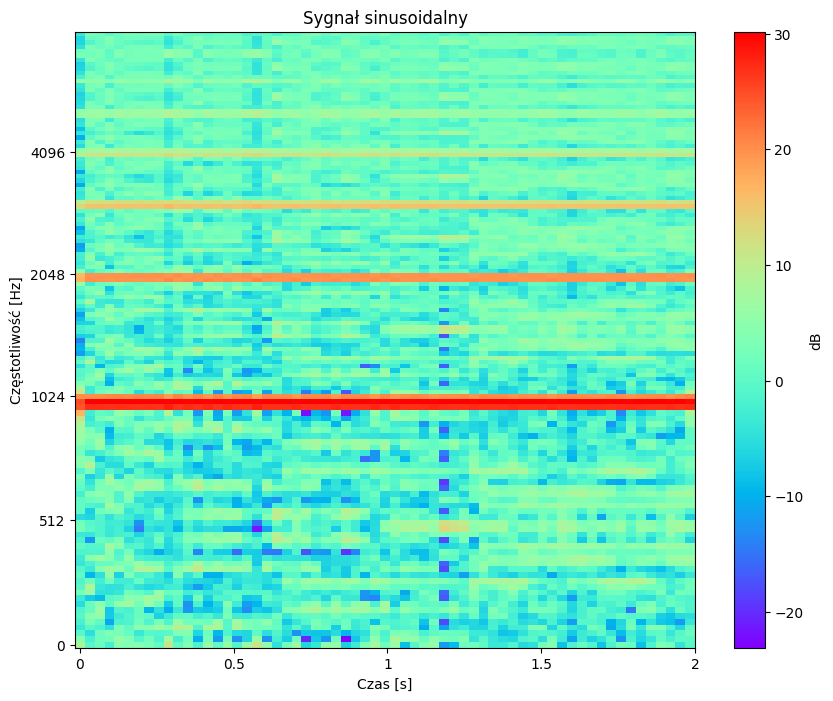

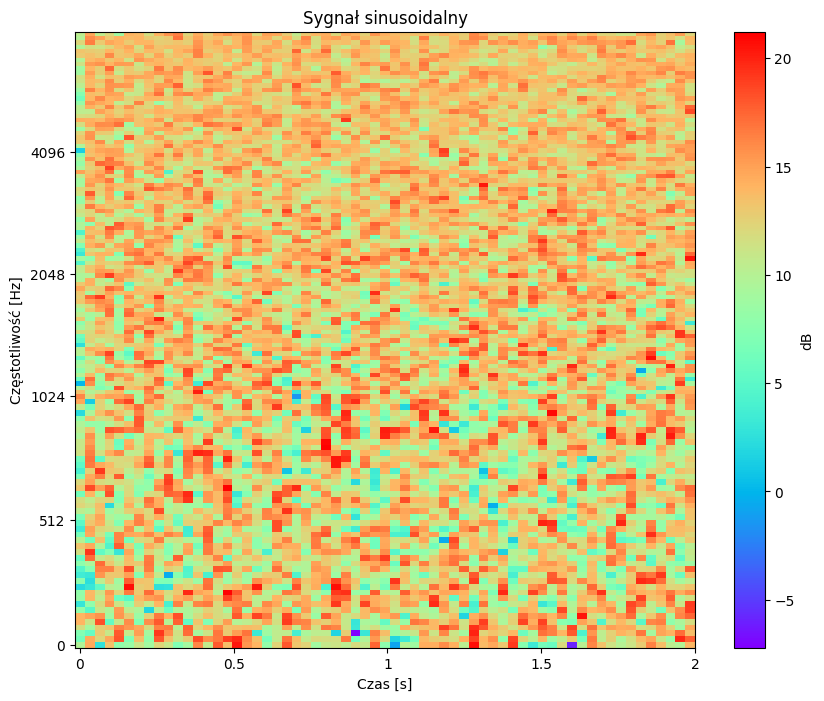

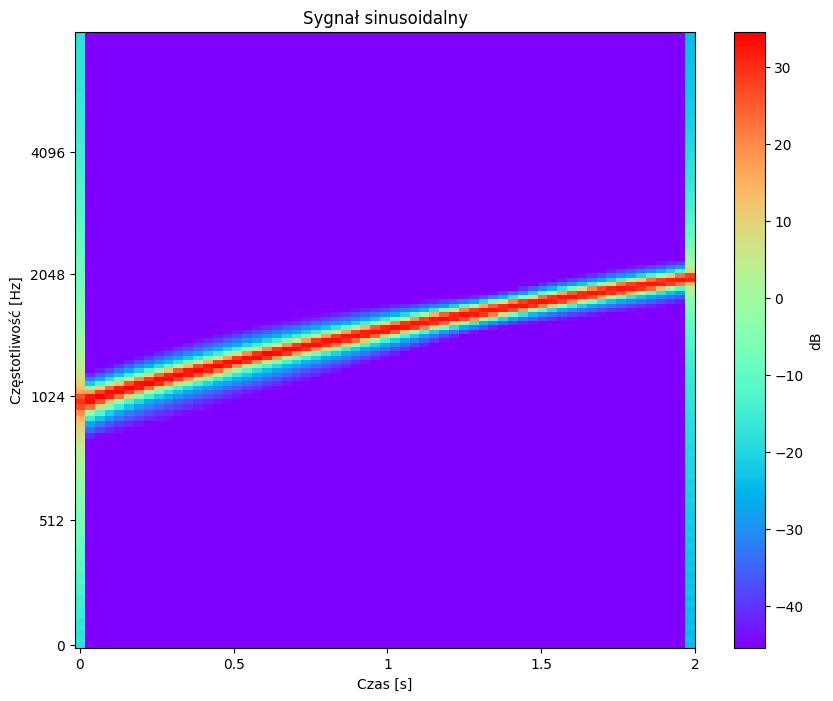

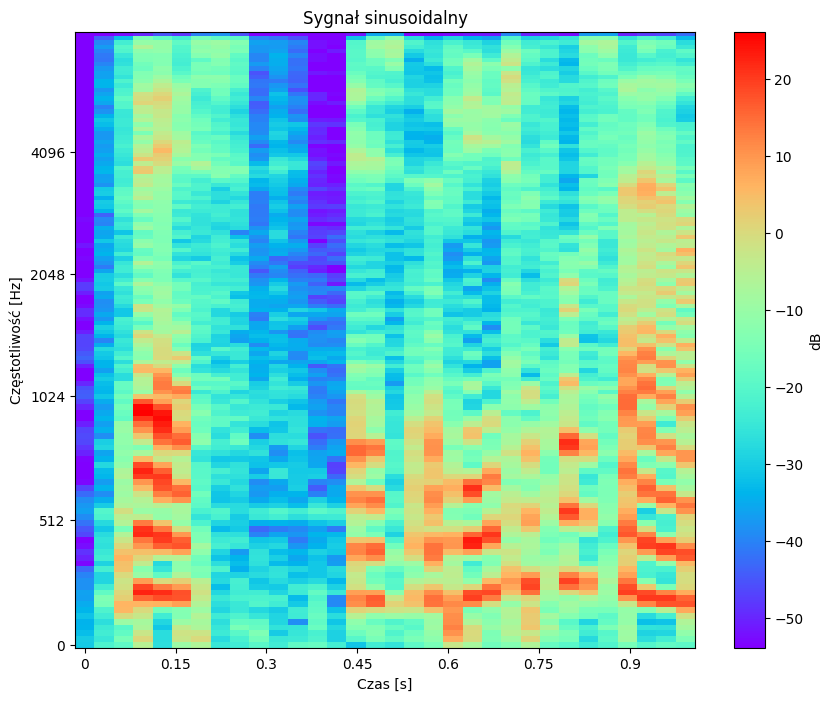

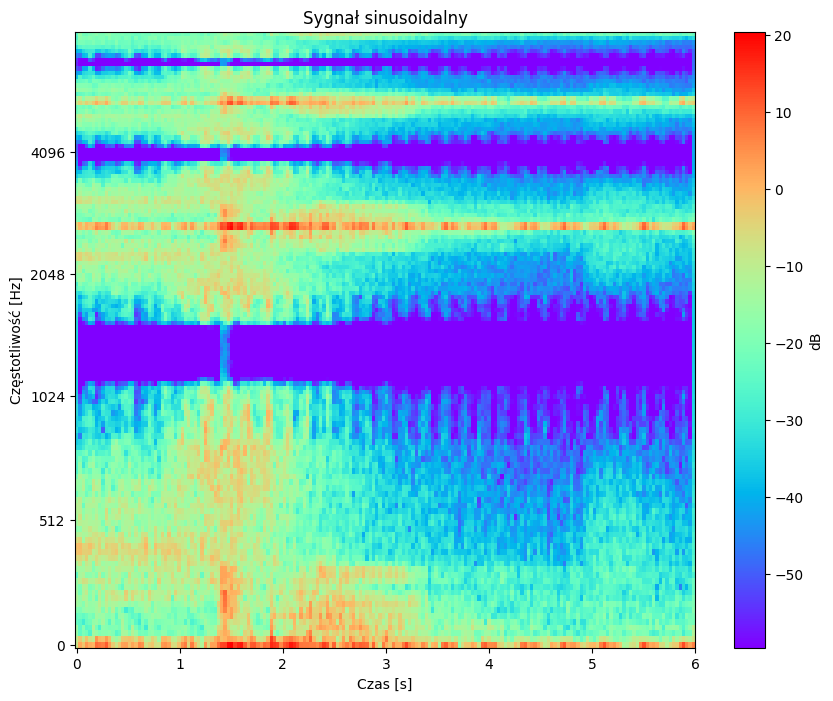

In [9]:
FS = 16000
TS = 1 / FS

FS_VOICE = 8000
TS_VOICE = 1 / FS_VOICE

FS_MUSIC = 48000
TS_MUSIC = 1 / FS_MUSIC

F = 1000

voice = wave.open('../audio/my_voice.wav')
music = wave.open('../audio/music.wav')

x_values = np.arange(0, 2, TS)
sin_values = np.sin(2 * np.pi * x_values * F)
square_values = signal.square(2 * np.pi * x_values * F)
triangle_values = signal.sawtooth(2 * np.pi * x_values * F, 0.5)
sawtooth_values = signal.sawtooth(2 * np.pi * x_values * F)
gauss_values = np.random.normal(0, 1, len(x_values))
chirp_values = signal.chirp(x_values, 1000, 2, 2000)

voice_y_values = np.resize(np.frombuffer(voice.readframes(-1), dtype='int16'), 16000) / 20000

music_y_values = np.resize(np.frombuffer(music.readframes(-1), dtype='int16'), 96000) / 10000

for mel in [
    Mel(sin_values, 'sygnał sinusoidalny'),
    Mel(square_values, 'sygnał prostokoątny'),
    Mel(triangle_values, 'sygnał trójkątny'),
    Mel(sawtooth_values, 'sygnał piłokształtny'),
    Mel(gauss_values, 'szum gaussowski'),
    Mel(chirp_values, 'sygnal sinusoidalny o przestrajanej czestotlwosci 1khz - 2khz'),
    Mel(voice_y_values, 'sygna mowy'),
    Mel(music_y_values, 'sygnał muzyki')
]:
    mel.draw()

pyplot.show()


# Wnioski
- Spektrogram w danej chwili jest w stanie oszacować widmową gęstość w czasie. Sąsiędnie segmenty nakładają się na siebie dzięki czemu zmienjsza się warjiacja oszacowania.
- Analiza obwiedni mocy sygnału, pozwala stwierdzić czy sygnał który aktualnie badamu jest stacionarny.

# Podpisy
![Podpis](../signatures/004.jpg)
